Una delle applicazioni più interessanti di Pandas è sicuramente la possibilità di aggregare dei dati secondo determinati criteri ed effettuare delle operazioni come il calcolo della media, la somma, o il valore cumulato su questi dati aggregati. 

Ad esempio abbiamo i dati su altezza, sesso di una classe di studenti di un liceo disposti all'interno di una tabella e vogliamo calcolare l'altezza media dei ragazzi e delle ragazze. 

Questa operazione di suddivisione in gruppi (maschio-femmina), calcolo del valore medio e aggregazione dei risultati in una nuova tabella può essere fatto in python con estrema facilità.

E' evidente la similarità con SQL ed i database relazionali, dove è possibile filtrare, unire ed aggregare diverse tipologie e fonti di dati. 

In Python, con Pandas, queste operazioni possono essere effettuate grazie alla classe GroupBy
La filosofia che c'è dietro la classe è "Split -> Apply -> Combine".

Spiego meglio:

1) Split-Suddividere il nostro set di dati originale in gruppi secondo determinati criteri

2) Applying- Applicare separatamente ad ogni gruppo una funzione (somma-media ecc)

3) Combining- Riorganizzare i dati aggregati 

Sul mio profilo Git Hub trovate il .csv se volete allenarvi con questo piccolo dataset.

Vi consiglio di riprodurre sul vostro notebook il codice in questo modo l'argomento sarà di più facile comprensione.

In [1]:
#Importiamo i moduli necessari
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Carichiamo e leggiamo il csv
csvname="reading_pomodoro_records.csv"
#definiamo le colonne
columns_name=['Index','Year', 'Month', 'Day', 'Time', 'Length', 'Start', 'End', 'Activity', 'Date','main_activity','sub_activity']
#Saltiamo la prima riga contentente i titoli delle colonne del dataframe
#Attraverso l'argomento skiprows
df=pd.read_csv(csvname,names=columns_name,sep=',',skiprows=1, index_col=False)
#visualizziamo l'inizio del csv 
#per capire come è definito
print('Numero di registrazioni:',len(df))
print()
print(df.head())

Numero di registrazioni: 105

   Index  Year  Month  Day       Time               Length       Start  \
0  10033  2019      1    9   22:28:22  1900-01-01 00:25:00  1547069302   
1  10058  2019      1   11   13:06:02  1900-01-01 00:25:00  1547208362   
2  10085  2019      1   12   18:36:11  1900-01-01 00:25:00  1547314571   
3  10086  2019      1   12   19:06:11  1900-01-01 00:25:00  1547316371   
4  10112  2019      1   14   19:43:36  1900-01-01 00:25:00  1547491416   

          End                   Activity                 Date main_activity  \
0  1547070802   +Lettura @lasincronicità  2019-01-09 00:00:00     +Lettura    
1  1547209862       +Lettura @quotidiano  2019-01-11 00:00:00     +Lettura    
2  1547316071   +Lettura @lasincronicità  2019-01-12 00:00:00     +Lettura    
3  1547317871   +Lettura @lasincronicità  2019-01-12 00:00:00     +Lettura    
4  1547492916   +Lettura @lasincronicità  2019-01-14 00:00:00     +Lettura    

     sub_activity  
0  lasincronicità  
1      quo

Ogni record dalla colonna "Length" si può notare dura 25 minuti. 

Quello che andrò a fare con questo esempio è capire per ogni libro presente nella colonna "sub_activity" quanti sono i record associati (o quanto tempo ho dedicato ad ogni libro). 

Per fare questo quindi divido i record in vari gruppi che dipendono dalla colonna sub_activity ed applico una funzione di conteggio.

La colonna "sub_activity" sarà la chiave (key) in base alla quale aggregare i risultati.

Una volta caricato il nostro dataset possiamo instanziare l'oggetto groupby ed eseguire tutte le operazioni per l'analisi che vogliamo effettuare. 

In questo esempio la nostra Key o chiave è una colonna del dataframe stesso. 

Ma in generale può essre: 

1) Una lista o un array di valori della liunghezza dell'asse che verrà aggregato

2) Una colonna del DataFrame

3) Una Series o un Dizionario 

4) una funzione che viene invocata 


In [3]:
oggetto_groupby=df['Activity'].groupby(df['sub_activity'])
#Contiamo il numero di registrazioni effettuate 
conteggio_record=oggetto_groupby.count()
print('Conteggio registrazioni:')
print(conteggio_record)
#In ordine decrescente visualizziamo il risultato della nostra operazione
conteggio_ordinato=conteggio_record.sort_values(ascending=False)
#Visualizzaimo il risultato
print('Le registrazioni per ogni libro sono state:')
print(conteggio_ordinato)
#Ricordando che ogni registrazione 
#Corrisponde a 25 minuti 
#Perchè basato sulla tecnica del pomodoro 
#Possiamo  conoscere le ore 
#Dividendo il nostro risultato per due
conteggio_ordinato_diviso=conteggio_ordinato.divide(2)
print('Le ore dedicate ad ogni libro sono state:')
print(conteggio_ordinato_diviso)

Conteggio registrazioni:
sub_activity
Libro RichDadPoorDad     3
ServiceDesign            4
ThinkingFastAndSlow     84
lasincronicità          10
quotidianihbr            3
quotidiano               1
Name: Activity, dtype: int64
Le registrazioni per ogni libro sono state:
sub_activity
ThinkingFastAndSlow     84
lasincronicità          10
ServiceDesign            4
quotidianihbr            3
Libro RichDadPoorDad     3
quotidiano               1
Name: Activity, dtype: int64
Le ore dedicate ad ogni libro sono state:
sub_activity
ThinkingFastAndSlow     42.0
lasincronicità           5.0
ServiceDesign            2.0
quotidianihbr            1.5
Libro RichDadPoorDad     1.5
quotidiano               0.5
Name: Activity, dtype: float64


Text(0.5, 1.0, 'Ore dedicate e Libri letti ')

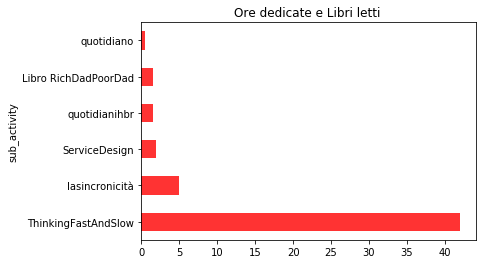

In [4]:
fig= plt.figure()
conteggio_ordinato_diviso.plot.barh( color='r', alpha=0.8)

plt.title('Ore dedicate e Libri letti ')


Ovviamente potete effettuare sul dataset anche altre operazioni come il calcolo della media 
Nei prossimi articoli sarò meno teorico 
e pubblicherò "delle ricette"
che ho trovato utili 
per le mie analisi su stack overflow  
e magari possono essere utili anche a voi. 